# Primeira etapa - Simulações numéricas essenciais.

In [23]:
import math
from cmath import *
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

## Constantes

In [70]:
R1 = R2 = 0.5
L1 = L2 = 300e-3
C1 = C2 = 1e-6
k = 0.1
RC = 1

In [51]:
m = k * math.sqrt(L1 * L2)
w = 1 / (math.sqrt(L1 * C1))
f_res = w / (2 * pi)

In [71]:
def CalcularTransformador(Uf, Rc, w, k):
    m = k * math.sqrt(L1 * L2)
    XL1 = w * L1 * 1j
    XC1 = 1/(w * C1 * 1j)
    XM = m * w * 1j
    XL2 = w * L2 * 1j
    XC2 = 1 / (w * C2 * 1j)
    Zrc_c2 = (Rc * XC2) / (Rc + XC2)
    Z = np.array([[R1 + XL1 + XC1, -XM], [-XM, XL2 + R2 + Zrc_c2]])
    V = np.array([Uf, 0])
    i = np.dot(linalg.inv(Z), V)
    return i[0], i[1]

Freq onde o I1 e max: 484.2646264626462


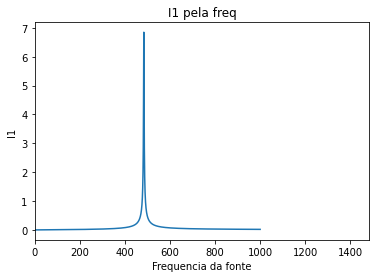

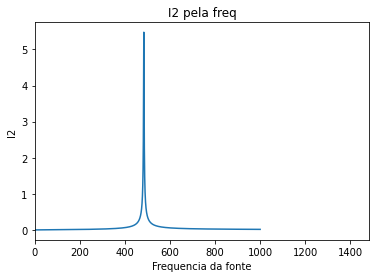

In [102]:
i1_list = []
i2_list = []
freqs = np.linspace(1, 1000, 10_000)
k = 0.8
for freq in freqs:
    w = 2 * pi * freq
    i1, i2 = CalcularTransformador(10, RC, w, k)
    i1_list.append(i1)
    i2_list.append(i2)

index_imax = i1_list.index(max(i1_list))
f_res = freqs[index_imax]
print(f"Freq onde o I1 e max: {f_res}")

plt.plot(freqs, np.abs(i1_list))
plt.title("I1 pela freq")
plt.xlabel('Frequencia da fonte')
plt.ylabel("I1")
plt.xlim(0, f_res + 1000)
plt.show()
plt.plot(freqs, np.abs(i2_list))
plt.title("I2 pela freq")
plt.xlabel('Frequencia da fonte')
plt.xlim(0, f_res + 1000)
plt.ylabel("I2")
plt.show()

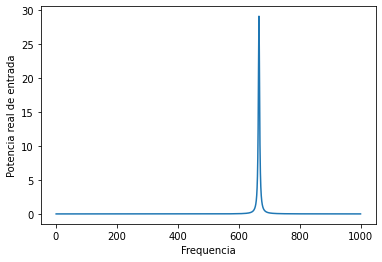

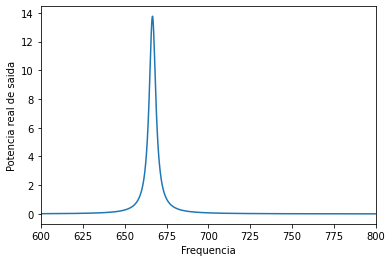

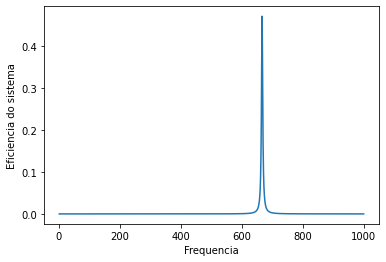

In [101]:
p_1 = []
p_2 = []

for i, freq in enumerate(freqs):
    p_1.append((10 * i1_list[i].conjugate()) / 2)
    z_c2 = 1 / (freq * 2 * pi * C2 * 1j)
    z_rcc2 = (z_c2 * RC) / (z_c2 + RC)
    u_rcc2 = z_rcc2 * i2_list[i]
    i_rc = u_rcc2 / RC 
    p_2.append((RC * i_rc * i_rc.conjugate()) / 2)

eficiencia = [p_2[i] / p_1[i] for i in range(0, len(p_1))]

plt.plot(freqs, np.real(p_1))
plt.xlabel("Frequencia")
plt.ylabel("Potencia real de entrada")
plt.show()
plt.plot(freqs, np.real(p_2))
plt.xlabel("Frequencia")
plt.ylabel("Potencia real de saida")
plt.xlim(600, 800)
plt.show()

plt.plot(freqs, np.real(eficiencia))
plt.xlabel("Frequencia")
plt.ylabel("Eficiencia do sistema")
plt.show()

In [ ]:
freqs = np.linspace(1, 1000, 10_000)
k = 0.8
for freq in freqs:
    w = 2 * pi * freq
    i1, i2 = CalcularTransformador(10, RC, w, k)
    i1_list.append(i1)
    i2_list.append(i2)

index_imax = i1_list.index(max(i1_list))
f_res = freqs[index_imax]